# Домашнее задание №7: деревья, случайный лес (14.5 баллов)
<!-- ![](meme.jpg) -->
<img src="meme.jpg" alt="Drawing" style="width: 700px;"/>

## Часть 1: основы построения решающие дерева

начнём с простого...

### Задание 1.1 (1 балл)
Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 - $k_2$. Посчитайте энтропию (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

#### (*・‿・)ノ⌒*:･ﾟ✧

Ответ:

Возможны n = 2 исхода: объект принадлежит классу $k_1$ либо классу $k_2$.

Вероятность того, что объект относится к первому классу: Р($k_1$) = 8/10 = 0.8, ко второму классу: Р($k_2$) = 2/10 = 0.2.
Из полученных вероятностей классов уже можно судить о том, что энтропия не будет высокой.

Вычислим ее по следующей формуле:
$$
H(p_1, ..., p_l) = -\sum_{i = 1}^{\ell}p_i  logp_i.
$$

Подставив известные нам вероятности, получим:
$$
H(p_1, p_2) = - p_1 logp_1 - p_2 logp_2 = - 0.8log0.8 - 0.2log0.2 = 0.5.
$$

Энтропия в данном случае равна 0.5.

### Задание 1.2 (1 балл)
Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности (в формулировке разности impurity пришедшей выборки и полученного разбиения) такой вершины с применением индекса Джини. Ответ округлите до двух знаков после запятой.

#### (￣▽￣)/♫•*¨*•.¸¸♪

Ответ:

Критерий информативности:
$$
Q(R, j, t) = H(R) - \frac{|R_l|}{|R|}H(R_l) - \frac{|R_r|}{|R|}H(R_r).
$$

При этом критерий Джини вычисляется по следующей формуле:
$$
H(p_1, ..., p_l) = \sum_{i = 1}^{\ell}p_i(1 - p_i),
$$
где $p_i$ - доля объектов i-ого класса в вершине.

Критерий Джини дает нам вероятность ошибки случайного классификатора, который выдаёт класс $k$ с вероятностью $p_k$.

Так как в каждой из вершин, полученных после оптимального разбиения изначальной, будут одназначно определены вероятности определения класса, т.е. $k_1$ с вероятностью $p_1$ = 1 для первой вершины и $k_2$ с вероятностью $p_2$ = 2 для второй, соответствующие слагаемые $H(R_l)$ и $H(R_r)$ будут равны 0 (т.е. для любого объекта, оказавшегося в любой из этих вершин, вероятность ошибки будет равна 0).

Q(R, j, t) = H(R) - H(R_l) - H(R_r) = H(R) - 0 = 0.8(1 - 0.8) + 0.2(1 - 0.2) = 0.32.

Критерий информативности будет равен 0.32.

### Задание 1.3 (0.5 балла)
Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

#### ༼ つ ◕_◕ ༽つ

Ответ:
    
В листовой вершины для задачи регрессии константный прогноз считается как среднее арифметическое объектов выборки, попавших в данную вершину при построении дерева.

Таким образом, предсказания модели для этих объектов будут равны (1 + 10 + 5 + 18 + 100 + 30 + 50 + 61 + 84 + 47)/10 = 40.6.

## Часть 2: решающие деревья

### Задание 2.1 (2 балла)
Первым делом реализуйте функцию `find_best_split`, которая должна находить оптимальное разбиение подмножества обучающей выборки. При решении задачи регрессии используйте дисперсию подвыборки, при решении задачи классификации используйте критерий Джини. Эту функцию можно протестировать на датасете `Boston` из `sklearn`.

In [1]:
from collections import Counter
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
X = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
y = boston["target"]
X.head()

print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

При решении задания имейте в виду, что под критерием Джини подразумевается такая функция:

$$Q(R) = -\frac {|R_{\ell}|}{|R|}H(R_\ell) -\frac {|R_r|}{|R|}H(R_r) ,$$

где $R$ — множество объектов, попавших в вершину, $R_{\ell}$ и $R_r$ — объекты, попавшие в левое и правое поддеревья,
$H(R) = 1 - p_1^2 - p_0^2$, $p_1$, $p_0$ — доли объектов класса 1 и 0 соответственно.

Для категориальных признаков применяется наивный алгоритм разбиения: мы пытаемся найти одно значение, разбиение по которому сильнее всего увеличит критерий информативности. Иными словами, объекты с конкретным значением признака отправляем в левое поддерево, остальные - в правое. Обратите внимание, что это далеко не оптимальные способ учёта категориальных признаков. Например, можно было бы на каждое значение категориального признака создавать отдельное поддерево или использовать более сложные подходы. Подробнее об этом можно прочитать в конспектах [лекций](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture07-trees.pdf) по машинному обучению на ПМИ (раздел «Учёт категориальных признаков»).

В качестве подсказок реализации можете пользоваться кодом из бонусной части семинара по решающим деревьям (скачайте решённую версию ноутбука).

**Note:** Разрешается делать цикл для перебора порогов, но возможна имплементация без него. За имплементацию без цикла бонус 0.7 балла

In [3]:
def H(target_vector, task):
    if task == "regression":
        return target_vector.var()
    
    elif task == "classification":
        # на случай если число классов >= 2
        
        # возвращает категории и число раз, которое они появляются
        vec_unique, vec_unique_times = np.unique(target_vector, return_counts=True) # returns the sorted unique elements
        
        # получаем доли
        p_i = vec_unique_times / len(target_vector)
        
        # считаем по критерию Джини
        return sum(p_i * (1 - p_i))

In [4]:
def split_node(feature_vector, feature_type, target_vector, t):
    
    if feature_type == "real":
        # mask = feature_vector <= t
        # return feature_vector[mask], feature_vector[~mask]       
        indexes = np.where(feature_vector <= t)[0]
        noindexes = np.where(feature_vector > t)[0]
    
    elif feature_type == "categorical":
        # mask = feature_vector == t
        # return feature_vector[mask], feature_vector[~mask]
        indexes = np.where(feature_vector == t)[0]
        noindexes = np.where(feature_vector != t)[0]
        
    target_vector_l = target_vector[indexes]
    # target_vector_r = target_vector[np.array(list(set(range(0, len(target_vector))) - set(indexes)))]
    target_vector_r = target_vector[noindexes]
    return target_vector_l, target_vector_r

In [5]:
def q_error(feature_vector, feature_type, target_vector, task, t):
    R_l, R_r = split_node(feature_vector, feature_type, target_vector, t)
    return len(R_l) / len(target_vector) * H(R_l, task) + len(R_r) / len(target_vector) * H(R_r, task)

In [6]:
def find_best_split(
    feature_vector: Union[np.ndarray, pd.DataFrame], 
    target_vector: Union[np.ndarray, pd.Series],
    task: str = "classification",
    feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :param task: либо `classification`, либо `regression`
    :param feature_type: либо `real`, либо `categorical`
    
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

    if feature_type == "real":
        random_number = 8
        unique = np.unique(feature_vector)
        
        if len(unique) != 1:
            # просто убираю первый элемент вектора с уникальными значениями, а в конец вставляю рандомное число,
            # мне нравится 8;
            # после складываю с изначальным вектором, последний элемент нам не нужен, поэтому убираю его;
            # и делю на 2, чтобы получить среднее
            thresholds = (unique + np.hstack([unique[1:], random_number]))[:-1] / 2
        else: # константный признак
            thresholds = unique
        
    elif feature_type == "categorical":
        thresholds = np.unique(feature_vector)
        
    Q_array = []
    Q_array = list(map(lambda x: q_error(feature_vector, feature_type, target_vector, task, x), thresholds))
    
    # for t in thresholds:
    #     Q_array.append(q_error(feature_vector, feature_type, target_vector, task, t))
        
    Q_array = np.nan_to_num(Q_array, nan=float("+inf"))
        
    if len(np.where(Q_array == min(Q_array))[0]) > 1: # при одинаковых приростах Джини или дисперсии
        opt_threshold = min(thresholds[np.where(Q_array == min(Q_array))[0]])
    
    else:
        opt_threshold = thresholds[np.argmin(Q_array)]
    
    return thresholds, Q_array, opt_threshold, min(Q_array)
        


thresholds, variances, threshold_best, variance_best = find_best_split(
    X["CRIM"].to_numpy(), 
    y, 
    task="regression",
    feature_type="real"
)

In [25]:
# a = np.array([1,2,3,4])
# b = (a+np.hstack([10, a[:-1]]))[1:] / 2
# c = (a+np.hstack([a[1:], 10]))[:-1] / 2
# print(b)
# print(c)

[1.5 2.5 3.5]
[1.5 2.5 3.5]


Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку `CRIM`.

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

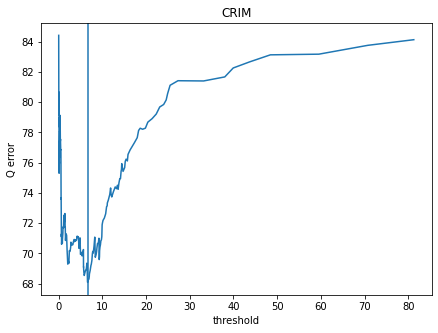

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(thresholds, variances)
plt.title("CRIM")
plt.xlabel("threshold")
plt.ylabel("Q error")
plt.axvline(x = threshold_best)
plt.show()

In [8]:
threshold_best

6.68632

In [9]:
variance_best

68.08324641384722

### Задание 2.2 (3 балла)
Разберитесь с написанным кодом решающего дерева, заполните пропуски в коде и реализуйте недостающий метод _predict_node.

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции в разделе «Построение дерева».
- Выбор лучшего разбиения необходимо производить по критерию Джини
- Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку
- Ответ в листе: наиболее часто встречающийся класс в листе

In [73]:
# import sys

In [10]:
class DecisionTree:
    def __init__(
        self, 
        feature_types: Union[List[str], np.ndarray], 
        max_depth: int = None, 
        min_samples_split: int = None, 
        min_samples_leaf: int = None,
        task: str = "classification"
    ) -> None:
        
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        # В этой переменной будем хранить узлы решающего дерева. Каждая вершина хранит в себе идентификатор того,
        # является ли она листовой. Листовые вершины хранят значение класса для предсказания, нелистовые - правого и
        # левого детей (поддеревья для продолжения процедуры предсказания)
        self._tree = {}
        
        # типы признаков (категориальные или числовые)
        self._feature_types = feature_types
        
        # гиперпараметры дерева
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.task = task

    def _fit_node(
        self, 
        sub_X: np.ndarray, 
        sub_y: np.ndarray, 
        node: dict
    ) -> None:
        # sys.setrecursionlimit(1000000) # чтобы не вылетали ошибки
        
        # критерий останова
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            # подготавливаем признак для поиска оптимального порога
            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                # здесь могла быть реализация более сложного подхода к обработке категориального признака
                feature_vector = sub_X[:, feature]

            # ищем оптимальный порог
            _, _, threshold, gini = find_best_split(feature_vector, sub_y, self.task, feature_type)
            
            if gini_best is None or gini < gini_best: # ПОМЕНЯЛА ЗНАК, изначально было >
                feature_best = feature
                gini_best = gini

                # split - маска на объекты, которые должны попасть в левое поддерево
                if feature_type == "real":
                    threshold_best = threshold
                    split = feature_vector <= threshold_best # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-    
                    
                elif feature_type == "categorical":
                    # в данной реализации это просто значение категории
                    threshold_best = threshold
                    split = feature_vector == threshold_best # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
                    
                else:
                    raise ValueError

        # записываем полученные сплиты в атрибуты класса
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["category_split"] = threshold_best
        else:
            raise ValueError
            
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def _predict_node(self, x: np.ndarray, node: dict) -> int:
        """
        Предсказание начинается с корневой вершины дерева и рекурсивно идёт в левое или правое поддерево в зависимости от значения
        предиката на объекте. Листовая вершина возвращает предсказание.
        :param x: np.array, элемент выборки
        :param node: dict, вершина дерева
        """
        while node["type"] == "nonterminal":
            
            if "threshold" in node.keys():
                if x[node["feature_split"]] <= node["threshold"]:
                    node = node["left_child"]
                else:
                    node = node["right_child"]
                    
            elif "category_split" in node.keys():
                if x[node["feature_split"]] == node["category_split"]:
                    node = node["left_child"]
                else:
                    node = node["right_child"]        
        
        # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
        return node["class"]

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self._fit_node(X, y, self._tree)

    def predict(self, X: np.ndarray) -> np.ndarray:
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
            
        return np.array(predicted)

### Задание 2.3 (1 балл)
Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

In [11]:
students = pd.read_csv(r'C:\Users\79152\Desktop\iad-intro-ds-master\2021\homeworks\hw07-trees-rf\students.csv')

In [12]:
students

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [13]:
X = students.iloc[:, :-1]
y = students.iloc[:, -1]

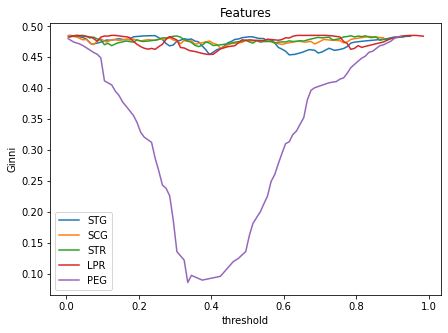

In [14]:
plt.figure(figsize=(7, 5))

for feature in X.columns:
    thresholds, ginis, threshold_best, gini_best = find_best_split(
                                                                        X[feature].to_numpy(), 
                                                                        y, 
                                                                        task="classification",
                                                                        feature_type="real"
                                                                        )
    plt.plot(thresholds, ginis, label=feature)
    #plt.axvline(x = threshold_best)

plt.title("Features")    
plt.xlabel("threshold")
plt.ylabel("Ginni")
plt.legend()
plt.show()

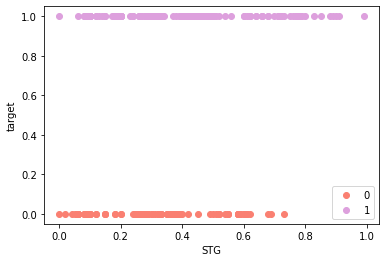

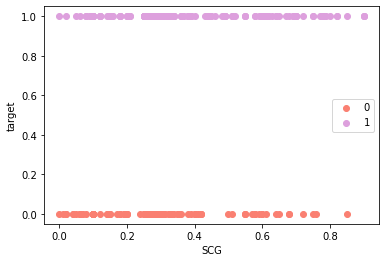

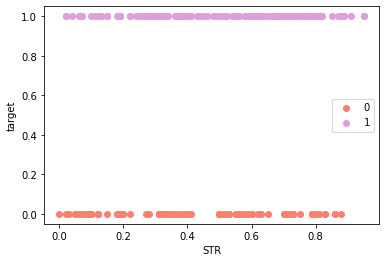

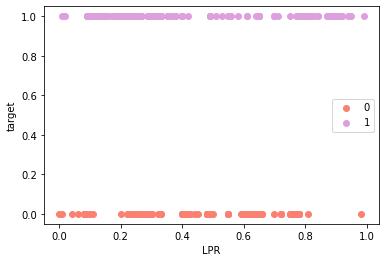

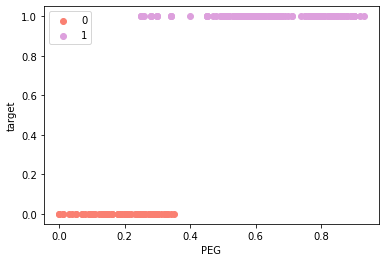

In [15]:
for feature in X.columns:
    # plt.scatter(X[feature], y, c=y)
    plt.scatter(X[feature][y == 0], y[y == 0], c='salmon', label='0')
    plt.scatter(X[feature][y == 1], y[y == 1], c='plum', label='1')
    plt.xlabel(feature)
    plt.ylabel("target")
    plt.legend()
    plt.show()

### Задание 2.4 (1 балл)

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

Мы хотим найти такие признак $j$ и порог $t$ для имеющейся выборки, чтобы разделить предикатом [$x[j] <= t$] выборку на два поддерева так, что критерий информативности примет наименьшее значение (из множества возможных, полученного перебором признаков $j$ и потенциальных для каждого из них порогов $t$). По полученным для каждого признака графикам видим, что наименьшей отметки критерий Джини достигает при ипользовании при делении выборки на две признака $PEG$ с порогом $t$ ~ $0.33$.

И да, это действительно согласуется со scatter-графиком, полученным для данного признака.
В то время как для почти любого значения других признаков присутствуют объекты, принадлежащие как к первому, так и ко второму классам, почти для всех объектов 1 класса $PEG$ <= $0.33$, при этом для большей части объектов 2 класса значение данного признака больше полученного порога (за исключением относительного небольшого числа объектов). Иными словами, распределение классов относительно признака $PEG$ достаточно неравномерное, в то время как для всех остальных признаков объекты распределены равномерно относительно их (признаков) значений. Ввиду этого критерий информативности, полученный для $PEG$, значительно ниже, чем у других признаков. Таким образом, довольно удачно получается разделить выборку.

Кривая для "хороших" признаков, по которым выборка делится почти идеально, должна выглядить как график выпуклой вниз функции, наподобие параболы, с максимально маленьким значением минимума.

Чем отличаются кривые для признаков, по которым деление практически невозможно?

Для каждого их "нехороших" признаков, тем не менее, при разных порогах в каждую из подвершин попадает большее или меньшее число объектов, принадлежащих разным классам. То есть вероятность ошибиться на объекте (критерий Джинни) колеблется от высокой до очень высокой. Где-то она относительно меньше, где-то - относительно больше. И для каждого такого признака при одном и том же значении порога $t$ эта вероятность получается своя. Этим и отличаются графики кривых для признаков, по которым деление практически невозможно.

### Задание 2.5 (1 балл)

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous). Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

In [16]:
X = pd.read_csv(r'C:\Users\79152\Desktop\iad-intro-ds-master\2021\homeworks\hw07-trees-rf\agaricus-lepiota.data')

In [17]:
X.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [18]:
X.shape

(8123, 23)

In [19]:
y = X.iloc[:, 0]
X = X.drop(X.columns[0], axis=1)

In [20]:
X.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g


In [21]:
X.shape

(8123, 22)

In [22]:
y.shape

(8123,)

In [23]:
X.isnull().any().any()

False

In [24]:
y.isnull().any().any()

False

Ни в Х, ни в у нет пропусков, которые нужно было бы заполнять. Радуемся.

Можем приступать к кодированию признаков.

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
le = LabelEncoder()

X = X.apply(le.fit_transform)    

In [27]:
X.head()

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

In [29]:
tree = DecisionTree(feature_types=["categorical"] * X_train.shape[1],
                   task = "classification")

In [30]:
tree.fit(X_train.to_numpy(), y_train.to_numpy())

In [31]:
y_pred = tree.predict(X_test.to_numpy())

In [32]:
accuracy_score(y_test, y_pred)

1.0

## Часть 3: бэггинг, случайный лес

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [3]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Посмотрим на распределение целевой переменной

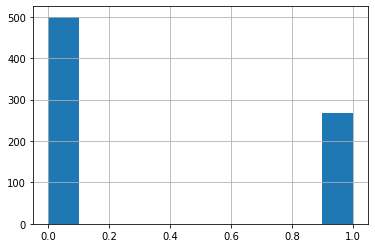

In [5]:
data['Outcome'].hist()
plt.show()

Разделите данные на признаки и целевую переменную. Разбейте датасет на тренировочную и тестовую части в отношении 70:30.

In [6]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Задание 3.1 (1 балл)

Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [7]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

base_tree = DecisionTreeClassifier(random_state=123)
bag = BaggingClassifier(base_estimator=base_tree, n_estimators=50)

In [8]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=123),
                  n_estimators=50)

In [9]:
y_pred = bag.predict(X_test)

In [10]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")

Accuracy: 0.7662337662337663
Precision: 0.7704918032786885
Recall: 0.5402298850574713
AUC-ROC: 0.7215038314176246


### Задание 3.2 (1 балл)

Теперь обучите Random Forest с таким же количеством деревьев. Оцените качество классификации по тем же метрикам. Какая из двух построенных моделей показала себя лучше?

In [11]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

rf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)

In [12]:
y_pred = rf.predict(X_test)

In [13]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}")

Accuracy: 0.7489177489177489
Precision: 0.7457627118644068
Recall: 0.5057471264367817
AUC-ROC: 0.7007902298850576


По всем метрикам однозначно показала себя лучше модель, построенная при помощи бэггинга.

### Задание 3.3 (1 балл)

Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров (можете сделать обычный перебор с обучением/тестированием в цикле):
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Используйте heat map для визуализации. Какие выводы вы можете сделать?

In [14]:
import seaborn as sns #; sns.set_theme()

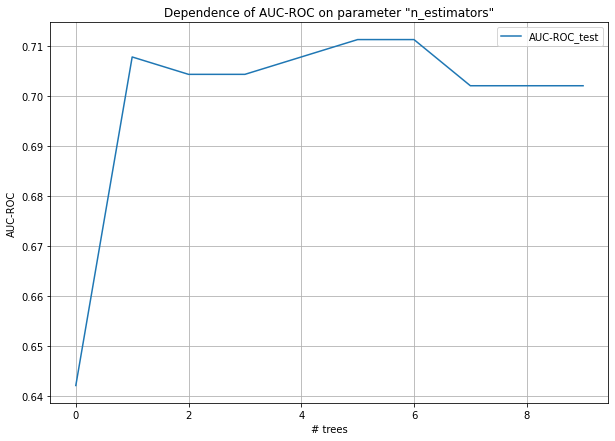

In [15]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
auc_rocs = []

for i in range(10, 1500, 149):
    rf = RandomForestClassifier(n_estimators=i, random_state=123)
    rf.fit(X_train, y_train)
    auc_rocs.append(roc_auc_score(y_test, rf.predict(X_test)))
    
plt.figure(figsize = (10, 7))
plt.grid()
plt.title('Dependence of AUC-ROC on parameter "n_estimators"')
plt.plot(auc_rocs, label = 'AUC-ROC_test')
plt.ylabel('AUC-ROC')
plt.xlabel('# trees')
plt.legend()

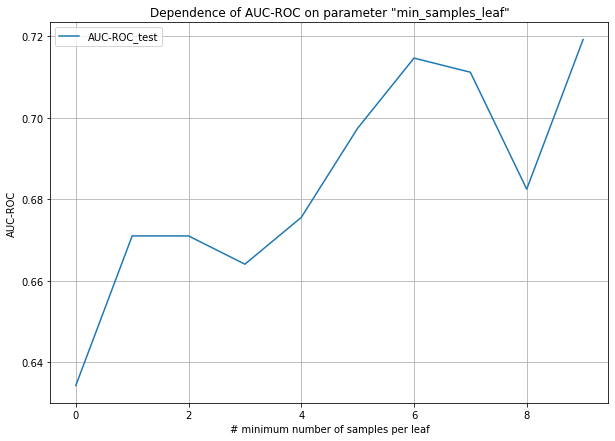

In [17]:
auc_rocs2 = []

for i in [50, 20, 15, 10, 8, 6, 5, 4, 3, 1]:
    rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=i, random_state=123)
    rf.fit(X_train, y_train)
    auc_rocs2.append(roc_auc_score(y_test, rf.predict(X_test)))
    
plt.figure(figsize = (10, 7))
plt.grid()
plt.title('Dependence of AUC-ROC on parameter "min_samples_leaf"')
plt.plot(auc_rocs2, label = 'AUC-ROC_test')
plt.ylabel('AUC-ROC')
plt.xlabel('# minimum number of samples per leaf')
plt.legend()

In [19]:
# from mpl_toolkits import mplot3d

In [18]:
auc_rocs3 = []
# x = []
# y = []

for i in range(10, 1500, 149):
    auc_rocs3.append([])
    for j in [50, 20, 15, 10, 8, 6, 5, 4, 3, 1]:
        rf = RandomForestClassifier(n_estimators=i, min_samples_leaf=j, random_state=123)
        rf.fit(X_train, y_train)
        auc_rocs3[-1].append(roc_auc_score(y_test, rf.predict(X_test)))
#         y.append(j)
#     x.append([i] * 10)

In [20]:
# from mpl_toolkits.mplot3d import Axes3D

In [222]:
# x = np.array(x).reshape(1, -1)
# y = np.array(y).reshape(1, -1)
# z = np.array(auc_rocs3).reshape(1, -1)

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot3D(x, y, auc_rocs3)
 
# plt.show()

<AxesSubplot:>

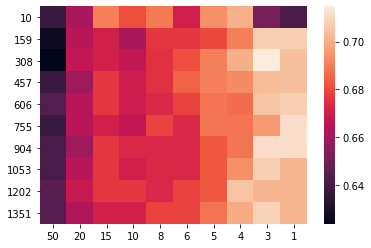

In [21]:
sns.heatmap(auc_rocs3,
           xticklabels = [50, 20, 15, 10, 8, 6, 5, 4, 3, 1], 
           yticklabels = range(10, 1500, 149))

In [22]:
np.divmod(np.array(auc_rocs3).argmax(), 10)

(2, 8)

In [23]:
np.max(np.array(auc_rocs3))

0.7146791187739464

In [24]:
np.array(auc_rocs3)[2][8]

0.7146791187739464

Из построенной тепловой карты видно, что максимальное значение $AUC-ROC$ принимает при параметрах случайного леса 
n_estimators = $308$ и min_samples_leaf = $3$ (при заданных нами множествах значений для этих параметров).

Из карты также можно сделать выводы о том, что слишком боольшое значение параметра min_samples_leaf (ось х) отрицательно влияет на $AUC-ROC$, метрику, которую мы хотим максимизировать. Про влияние параметра n_estimators нельзя ничего сказать так же однозначно, однако видно, что делать этот параметр слишком маленьким не стоит.

### Задание 3.4 (1 балл)

Для лучшей модели случайного леса посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета?

In [25]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

# Лучшая модель случайного леса имеет параметры: n_estimators = 308 и min_samples_leaf = 3

rf = RandomForestClassifier(n_estimators=308, min_samples_leaf=3, random_state=123).fit(X_train, y_train)

In [26]:
rf.feature_importances_ # их важности

array([0.08610812, 0.29802516, 0.07201856, 0.06263737, 0.07807065,
       0.14635761, 0.10982182, 0.14696071])

In [27]:
X_train.columns # признаки

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

<AxesSubplot:>

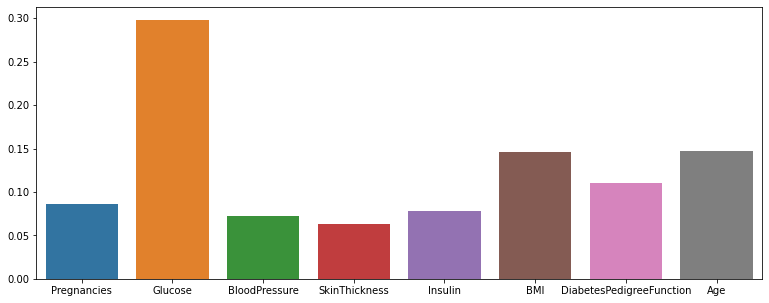

In [28]:
plt.figure(figsize=(13,5))

sns.barplot(x=X_train.columns, y=rf.feature_importances_)

Исходя из графика и полученных важностей признаков, можем сделать вывод о том, что самым важным для определения диабета оказался признак $Glucose$ - важность этого признака для модели  почти в 2 раза превышает значимости других фичей. И хоть полученные feature_importances_ значимы именно для данной модели и могут не совпадать с закономерностями реального мира, большое количество глюкозы, содержащейся в крови человека, действительно имеет немалое значение при заболевании диабетом, так что такая высокая значимость признака $Glucose$ вполне соотносится с действительностью.